To win a baseball game, a team has to make more runs than the opposing team.
1. Which performance metrics are highly correlated with total runs scored?
2. Which performance metrics to look for while choosing players to constitute a team?
3. Which performance metrics are highly valued by team managers?
4. How can we analyze performance of a team?

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
sns.set(style="white")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
teams = pd.read_csv('./baseballdatabank-master/core/Teams.csv', sep=',', keep_default_na=False, na_values=[''])
salaries = pd.read_csv('./baseballdatabank-master/core/Salaries.csv', sep=',', keep_default_na=False, na_values=[''])

In [24]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
yearID            2805 non-null int64
lgID              2805 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
yearID      25575 non-null int64
teamID      25575 non-null object
lgID        25575 non-null object
playerID    25575 non-null object
salary      25575 non-null int64
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


In [44]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
salary_vs_wins = pd.concat([salaries.groupby('teamID').mean()['salary'], teams.groupby('teamID').mean()['W']],axis=1)
salary_vs_wins.head()

,salary,W
ALT,nan,6.00
ANA,1895109.20,83.00
ARI,2479160.29,79.67
ATL,2206239.32,82.12
BAL,1915746.29,81.31


In [45]:
salary_vs_wins.describe()

,salary,W
count,35.00,149.00
mean,2012161.54,51.51
std,752280.01,27.51
min,613243.58,0.00
25%,1627389.07,30.00
50%,2068378.03,58.00
75%,2284711.00,76.06
max,4208635.81,94.00


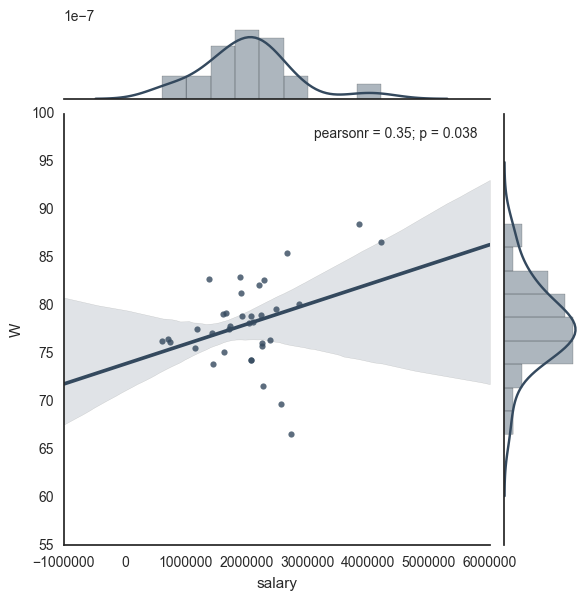

In [100]:
sns.jointplot(data=salary_vs_wins, x='salary', y='W', kind='reg', color="#34495e")

### Batting Statistics

In [48]:
teams['BA'] = teams['H']/teams['AB']

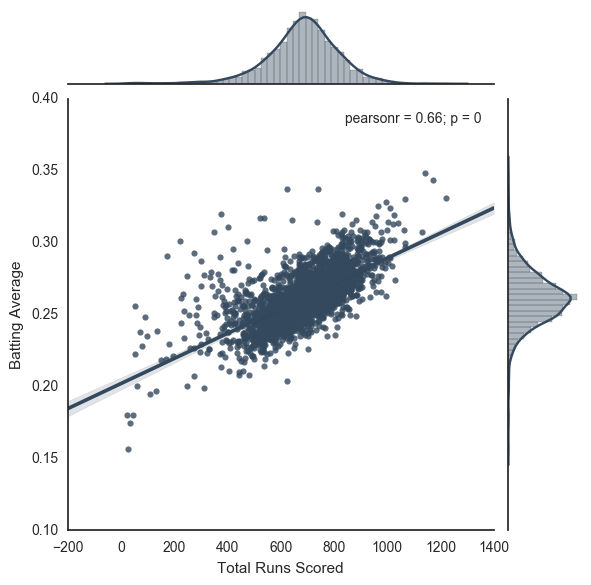

In [96]:
sns.jointplot(data=teams, x='R', y='BA', kind='reg', color="#34495e").set_axis_labels("Total Runs Scored","Batting Average")

In [64]:
# Compute the correlation matrix
corr = teams.drop(['yearID','Rank'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

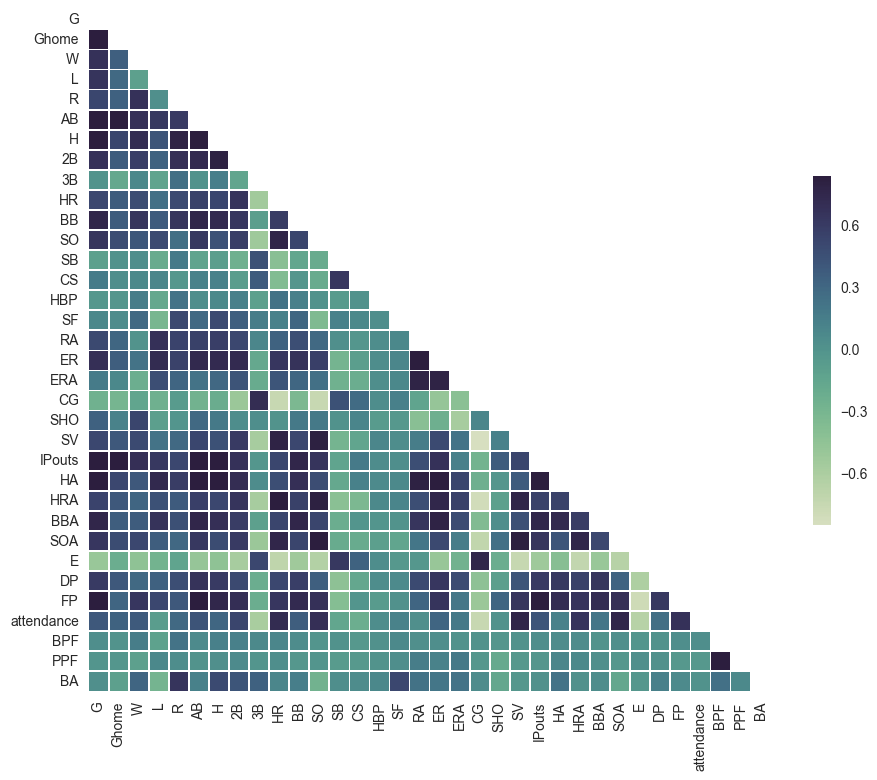

In [109]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)